In [226]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [227]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
underground_2021=121
#Length of undergeound lines in miles in base year
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [228]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [229]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


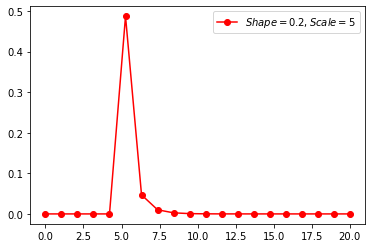

In [230]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [231]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [232]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


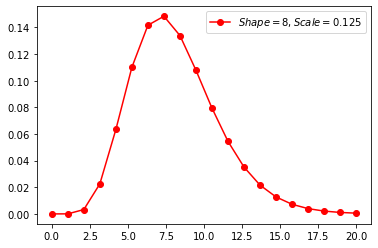

In [233]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

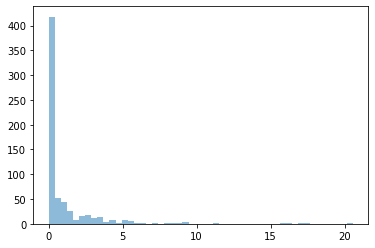

[5.47164117e-01 3.10295811e-01 1.94610529e-01 2.64913162e+00
 4.72513991e-05 7.30426845e-02 4.23672453e-06 3.52194595e-01
 3.68692045e-01 6.45513864e-02 2.21406880e+00 1.91871575e-03
 2.44423810e+00 2.13663564e-01 2.40495263e-05 3.45892392e-05
 3.20426689e-02 4.72021043e-01 1.01922293e-01 7.09090068e+00
 1.28260138e-03 4.37531138e-02 4.02937605e-11 1.23061653e+00
 2.35202694e-03 1.73845715e+00 5.41035688e-03 2.62018795e-01
 1.45530531e+00 3.66163662e-03 3.38179271e-01 2.57413295e-03
 1.63371805e+00 1.46481035e-04 3.87595480e-03 1.20374404e-03
 2.99688660e-01 6.42813347e+00 2.89722658e+00 4.25391892e+00
 8.91384429e+00 2.34683659e-02 4.18167725e-02 3.42929895e-01
 4.39001155e+00 5.40419308e-01 7.51544595e-01 1.16109722e-04
 6.49951054e+00 6.46162912e+00 7.92195494e-02 2.08810522e-03
 7.31457052e-02 4.60936201e-01 1.13348688e-04 1.06761731e-05
 1.97329948e+00 1.87183565e+00 4.28782102e-01 1.17737936e-02
 1.90663180e-01 9.66747939e-01 6.30944251e-02 4.59973395e-05
 6.44570498e-01 9.309004

In [234]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year (2021)

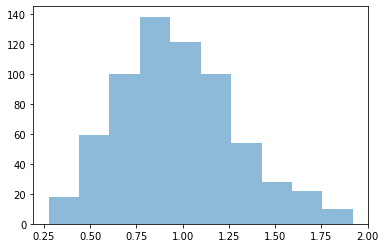

In [235]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [236]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [237]:
random.uniform(0,1)

0.8798477338761904

In [243]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_2021(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year (2021)
    def get_random_length_2021(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year (2021)
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        #over_or_under= self.get_underground()
        if self.underground==[0]:
            lifespan_x= int(overhead_line['lifespan'])
        elif self.underground==[1]:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x=0
        age_i_2021= self.age[0] #self.get_random_age_2021()
        age_i_t=0
        for t in range (2021,underground_line['lifespan']):
            if age_i_2021<=lifespan_x:
                age_i_t= (age_i_2021)+(t-2021)
            elif age_i_2021-lifespan_x==1:
                age_i_t=1
            elif age_i_2021-lifespan_x>1:
                age_i_t=(age_i_t)+1
            return(age_i_t)
    def get_current_age(self):
        current_age=self.get_age_array[-n]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        if self.underground==[0]:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif self.underground==[1]:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        else:
            lifespan_x=0
            replecost_x=0
            replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (2021,underground_line['lifespan']):
            if t==2021:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-2021)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
            return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        capex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            replcost_x_t= replcost_x[t]
            age_i=self.get_age_array()
            age_i_t=age_i[t]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)^(t-2021))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
            else:
                capex_StatusQuo_i=0
            return (capex_StatusQuo_i)
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t (self):
        #over_or_under = self.get_underground()
        age_i=self.get_age_array()
        replcost_x_t=self.get_replcost_x_t()
        if self.underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif self.underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        for t in range (2021,underground_line['lifespan']):
            opex_x_t=0
            age_i_t=age_i[t]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                None
            return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i (self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_2021()
        opex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            opex_x_t=opex_x[t]
            opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.get_capex_StatusQuo_i()
            opex_StatusQuo_i=self.get_opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_2021=self.get_random_age_2021()
        age_2021_i=age_2021[0]
        #over_or_under= self.get_underground()
        if self.underground==0:
            lifespan_x=overhead_line['lifespan']
        elif self.underground==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_2021_i)+2021
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #over_or_under= self.get_underground()
        if self.underground==0:
            self.underground=1
        length_i=self.get_random_length_2021()
        capex_underground_i=0
        rplcost_x_t=self.get_replcost_x_t()
        for t in range (2021,underground_line['lifespan']):
            capex_i=((rplcost_x_t)(length_i))/((1+r)^(t-2021))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        #over_or_under= self.get_underground()
        opex_x=self.get_opex_x_t()
        length_i=self.get_random_length_2021()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (2021,underground_line['lifespan']):
            opex_x_t=opex_x[t]
            if  self.underground==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    self.underground==1
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.get_capex_underground_i()
            opex_underground_i=self.get_opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_random_length_2021()
        for t in range (2021,underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_2021+sumlength
            else:
                underground_t=underground_2021
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.get_lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (2021,underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_2021()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [244]:
circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_over_or_under=circuit_i.get_underground()
print(circuit_over_or_under)
circuit_random_age_2021=circuit_i.get_random_age_2021
print(circuit_random_age_2021)
circuit_random_length_2021=circuit_i.get_random_length_2021
print(circuit_random_length_2021)
circuit_age_2021=circuit_i.get_random_age_2021()
print (circuit_age_2021)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
#circuit_age_i_t_list
print(age_i_list)
age_i_t=circuit_i.get_current_age
print(age_i_t)
#circuit_age_i_t_current age
#print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

[1]
<bound method Circuit.get_random_age_2021 of <__main__.Circuit object at 0x000001E4BA4A87F0>>
<bound method Circuit.get_random_length_2021 of <__main__.Circuit object at 0x000001E4BA4A87F0>>
[0.2795466050401066]
None
<bound method Circuit.get_current_age of <__main__.Circuit object at 0x000001E4BA4A87F0>>


In [240]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_2021=circuit_i.get_random_age_2021()
    #print (circuit_age_2021)
    circuit_age_i_t_list=[]
    for t in range (2021,underground_line['lifespan']):       
        age_i_t=circuit_i.get_age_array()
        circuit_age_i_t_list=circuit_age_i_t_list.append(age_i_t)
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [0] & Segment age in 2021= [0.000275903313595863] & Segment age in t= []
x= [0] & Segment age in 2021= [0.024521330070669842] & Segment age in t= []
x= [0] & Segment age in 2021= [7.602573377006434e-05] & Segment age in t= []
x= [1] & Segment age in 2021= [0.622075727653355] & Segment age in t= []
x= [1] & Segment age in 2021= [0.43985752344288725] & Segment age in t= []
x= [0] & Segment age in 2021= [0.40227530754903107] & Segment age in t= []
x= [1] & Segment age in 2021= [0.0680209263315345] & Segment age in t= []
x= [0] & Segment age in 2021= [2.4646817702981996] & Segment age in t= []
x= [0] & Segment age in 2021= [3.5707574759995256e-05] & Segment age in t= []
x= [0] & Segment age in 2021= [0.30563860954636757] & Segment age in t= []
x= [0] & Segment age in 2021= [0.5552115186645142] & Segment age in t= []
x= [0] & Segment age in 2021= [0.00024081521281582482] & Segment age in t= []
x= [0] & Segment age in 2021= [0.017717808138632288] & Segment age in t= []
x= [0] & Segment ag

x= [1] & Segment age in 2021= [1.1064025352822244] & Segment age in t= []
x= [0] & Segment age in 2021= [0.12082174476667962] & Segment age in t= []
x= [0] & Segment age in 2021= [0.18969207855957265] & Segment age in t= []
x= [1] & Segment age in 2021= [1.4996484720987557] & Segment age in t= []
x= [0] & Segment age in 2021= [6.620264357099619e-06] & Segment age in t= []
x= [0] & Segment age in 2021= [0.14641158411755034] & Segment age in t= []
x= [0] & Segment age in 2021= [10.607332445858969] & Segment age in t= []
x= [1] & Segment age in 2021= [3.45736522265864e-06] & Segment age in t= []
x= [0] & Segment age in 2021= [4.577083499475133] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0016357797796142585] & Segment age in t= []
x= [0] & Segment age in 2021= [0.05117087345966416] & Segment age in t= []
x= [1] & Segment age in 2021= [1.378544309817408] & Segment age in t= []
x= [0] & Segment age in 2021= [0.03350063542832197] & Segment age in t= []
x= [0] & Segment age in 202

x= [0] & Segment age in 2021= [0.7687134428356229] & Segment age in t= []
x= [1] & Segment age in 2021= [0.08864717540550397] & Segment age in t= []
x= [0] & Segment age in 2021= [4.5463113276237364e-05] & Segment age in t= []
x= [1] & Segment age in 2021= [0.002708880679429902] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0885022959061926] & Segment age in t= []
x= [0] & Segment age in 2021= [0.412597809675994] & Segment age in t= []
x= [1] & Segment age in 2021= [0.0009736554467527818] & Segment age in t= []
x= [1] & Segment age in 2021= [0.24197049128967654] & Segment age in t= []
x= [0] & Segment age in 2021= [0.4347572564119313] & Segment age in t= []
x= [0] & Segment age in 2021= [1.100870639553148] & Segment age in t= []
x= [0] & Segment age in 2021= [2.465581936463388] & Segment age in t= []
x= [1] & Segment age in 2021= [1.9623193776043024] & Segment age in t= []
x= [0] & Segment age in 2021= [0.21619035067155046] & Segment age in t= []
x= [0] & Segment age in 2021=

In [241]:
#for i in range (number_circuit):
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

None
None
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [242]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    first_retire_i=circuit_i.get_first_retire_i()
    print(first_retire_i)
    capex_underground_i=circuit_i.get_capex_underground_i()
    print(capex_underground_i)
    opex_underground_i=circuit_i.get_opex_underground_i()
    print(opex_underground_i)
    lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
    print(ifecyclecost_underground)
    underground_t=circuit_i.underground_t()
    print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2020.9995185413522
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'